In [1]:
from keras.datasets.fashion_mnist import load_data
((X_train, y_train), (X_test, y_test)) = load_data()

Using TensorFlow backend.


4423680/4422102 [==============================] - 14s 3us/step


In [2]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


1


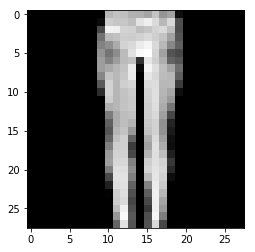

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
c = random.randint(0, X_train.shape[0]-1)
print(y_train[c])
plt.imshow(X_train[c], cmap='gray')

In [4]:
X_train_reshape = X_train.reshape(60000, 784) /255
X_test_reshape = X_test.reshape(10000, 784) /255
from keras.utils.np_utils import to_categorical
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [5]:
from keras.models import Sequential
from keras.layers import Dense

MLP = Sequential()
MLP.add(Dense(128, input_dim=784, activation='relu'))
MLP.add(Dense(10, activation='softmax'))
MLP.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [6]:
MLP.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
MLP.fit(X_train_reshape, y_train_categorical, 
        batch_size=200, epochs=15, validation_split=0.1, verbose=2)

Train on 54000 samples, validate on 6000 samples
Epoch 1/15
 - 1s - loss: 0.5944 - acc: 0.7988 - val_loss: 0.4536 - val_acc: 0.8410
Epoch 2/15
 - 1s - loss: 0.4191 - acc: 0.8540 - val_loss: 0.4174 - val_acc: 0.8543
Epoch 3/15
 - 1s - loss: 0.3793 - acc: 0.8667 - val_loss: 0.3700 - val_acc: 0.8648
Epoch 4/15
 - 1s - loss: 0.3553 - acc: 0.8739 - val_loss: 0.3643 - val_acc: 0.8687
Epoch 5/15
 - 1s - loss: 0.3345 - acc: 0.8819 - val_loss: 0.3492 - val_acc: 0.8708
Epoch 6/15
 - 1s - loss: 0.3241 - acc: 0.8849 - val_loss: 0.3511 - val_acc: 0.8737
Epoch 7/15
 - 1s - loss: 0.3109 - acc: 0.8884 - val_loss: 0.3428 - val_acc: 0.8753
Epoch 8/15
 - 1s - loss: 0.2964 - acc: 0.8931 - val_loss: 0.3448 - val_acc: 0.8743
Epoch 9/15
 - 1s - loss: 0.2891 - acc: 0.8961 - val_loss: 0.3417 - val_acc: 0.8745
Epoch 10/15
 - 1s - loss: 0.2787 - acc: 0.8989 - val_loss: 0.3312 - val_acc: 0.8777
Epoch 11/15
 - 1s - loss: 0.2693 - acc: 0.9026 - val_loss: 0.3187 - val_acc: 0.8855
Epoch 12/15
 - 1s - loss: 0.2601 - a

In [ ]:
MLP.evaluate(X_test_reshape, y_test_categorical)

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
pd.DataFrame(confusion_matrix(y_test,  MLP.predict_classes(X_test_reshape)))